In [23]:
import re
import numpy as np
import pandas as pd
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
from rich import print
from rich.table import Table
from rich.console import Console

data = pd.read_csv("csv_result-Final Dataset.csv")
df = pd.DataFrame(data)

# **Project Risk Matrix**

The core idea is to map numeric `Magnitude` and `Impact` values to a qualitative scale (e.g., Low, Medium, High). Then these categories used to build a table (a crosstab) that shows how many risks fall into each category


### **Probability Coding**


In [ ]:
def categorized_prob(df):
    bins = [0, 26, 51, 76, np.inf]
    labels = [
        "(0-25) Low Probability",
        "(25-50) Medium Probability",
        "(50-75) High Probability",
        "(75-100) Very High Probability",
    ]
    df["Probability_Category"] = pd.cut(
        df["Probability"], bins=bins, labels=labels, right=False
    )
    return df


df = categorized_prob(df)
display(df[["Probability", "Probability_Category"]])
print(df["Impact"].nunique())

,Probability,Probability_Category
0,10,(0-25) Low Probability
1,22,(0-25) Low Probability
2,33,(25-50) Medium Probability
3,40,(25-50) Medium Probability
4,100,(75-100) Very High Probability
...,...,...
294,15,(0-25) Low Probability
295,13,(0-25) Low Probability
296,10,(0-25) Low Probability
297,11,(0-25) Low Probability


5

### **Risk Matrix**


Impact,Low,catastrophic,high,insignificant,moderate,Total
Probability_Category,,,,,,
(0-25) Low Probability,37,5,15,7,37,101
(25-50) Medium Probability,25,1,26,9,46,107
(50-75) High Probability,10,5,12,4,26,57
(75-100) Very High Probability,7,2,9,0,16,34
Total,79,13,62,20,125,299


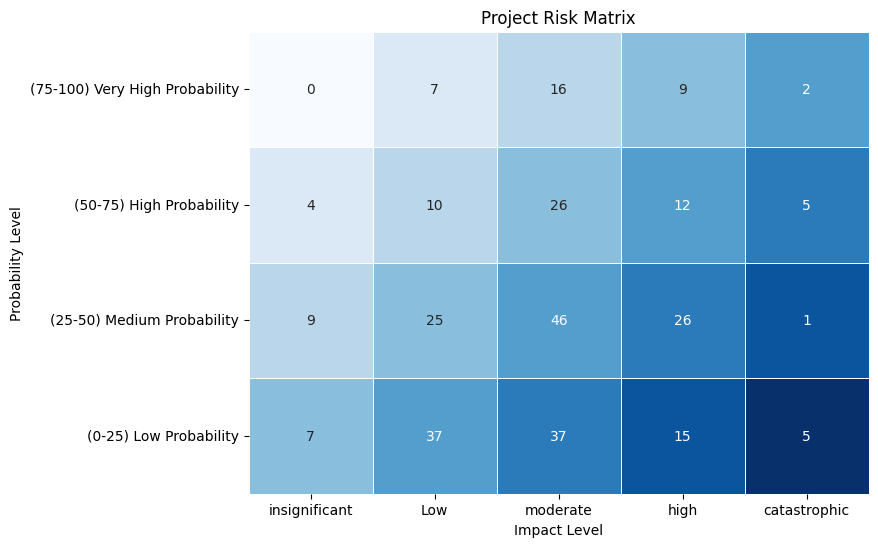

In [ ]:
risk_matrix_df = pd.crosstab(
    df["Probability_Category"],
    df["Impact"],
    dropna=False,
    margins=True,
    margins_name="Total",
)

impact_order = ["insignificant", "Low", "moderate", "high", "catastrophic"]
prob_order = sorted(df["Probability_Category"].unique(), reverse=True)


matrix = risk_matrix_df.drop(index=["Total"], columns=["Total"]).reindex(
    columns=impact_order, index=prob_order
)
rows, cols = matrix.shape
gradient = np.add.outer(np.arange(rows)[::1], np.arange(cols))
for i in range(rows):
    for j in range(cols):
        gradient[i, j] = i + j
plt.figure(figsize=(8, 6))
sns.heatmap(
    gradient,  # <- use gradient for coloring
    cmap="Blues",  # <- positional color mapping
    cbar=False,  # <- hide meaningless colorbar
    annot=matrix,  # <- overlay actual values
    fmt="d",
    linewidths=0.5,
    xticklabels=matrix.columns,
    yticklabels=matrix.index,
)
plt.title("Project Risk Matrix")
plt.xlabel("Impact Level")
plt.ylabel("Probability Level")
plt.show()

Impact,Low,catastrophic,high,insignificant,moderate,Total
Probability_Category,,,,,,
(0-25) Low Probability,37,5,15,7,37,101
(25-50) Medium Probability,25,1,26,9,46,107
(50-75) High Probability,10,5,12,4,26,57
(75-100) Very High Probability,7,2,9,0,16,34
Total,79,13,62,20,125,299


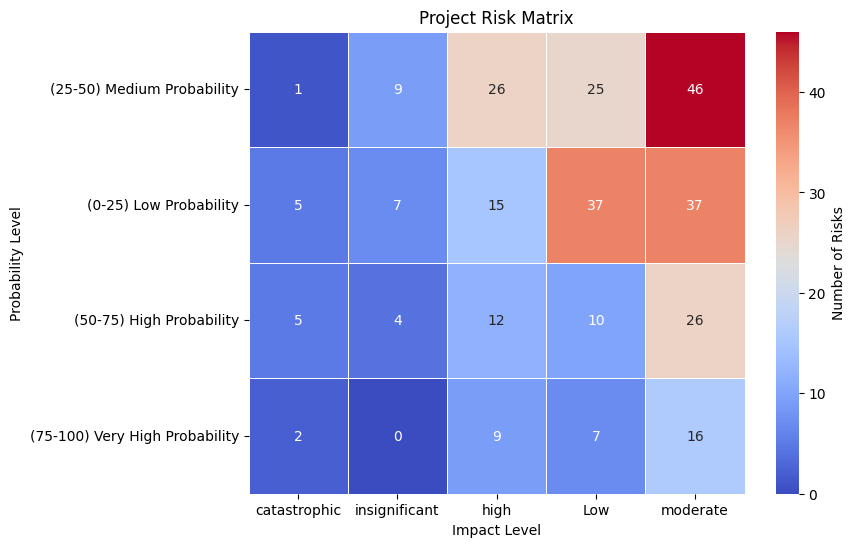

In [ ]:
risk_matrix_df = pd.crosstab(
    df["Probability_Category"],
    df["Impact"],
    dropna=False,
    margins=True,
    margins_name="Total",
)
display(risk_matrix_df)
impact_order = df["Impact"].value_counts(ascending=True).index
prob_order = df["Probability_Category"].value_counts(ascending=False).index
plt.figure(figsize=(8, 6))
sns.heatmap(
    risk_matrix_df.drop(index=["Total"], columns=["Total"]).reindex(
        columns=impact_order, index=prob_order
    ),
    annot=True,
    cmap="coolwarm",
    fmt="d",
    linewidths=0.5,
    cbar_kws={"label": "Number of Risks"},
)
plt.title("Project Risk Matrix")
plt.xlabel("Impact Level")
plt.ylabel("Probability Level")
plt.show()